In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


def read_csv_files_from_folder(folder_path):
    """
    Reads all CSV files from a specified folder and merges them into a single DataFrame.

    Parameters:
    folder_path (str): The path to the folder containing CSV files.

    Returns:
    pd.DataFrame: A Pandas DataFrame containing the merged data or None if no data is found.
    """
    try:
        # Create an empty list to store DataFrames
        dfs = []

        # Use glob to get a list of all CSV files in the folder
        csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

        if not csv_files:
            print("No CSV files found in the specified folder.")
            return None

        # Read and append each CSV file to the list
        for csv_file in csv_files:
            df = pd.read_csv(csv_file)
            if not df.empty:
                dfs.append(df)

        if not dfs:
            print("No valid data found in the CSV files.")
            return None

        # Concatenate all DataFrames vertically
        merged_df = pd.concat(dfs, ignore_index=True)

        return merged_df
    except FileNotFoundError:
        print("The specified folder or CSV files were not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [2]:
# Reading the dataset using our custom function
df = read_csv_files_from_folder("GSdata")

# Take a look at the first 5 rows of the dataset
df.head()

,label,animal_ID,segment_ID,timestamp_ms,ax,ay,az,axhg,ayhg,azhg,cx,cy,cz,gx,gy,gz,pressure,temp
0,walking,G1,1,1,1.57538,4.34787,-9.27514,5.61615,8.19897,10.21120,-0.5685,-0.7875,2.5245,10.54880,-28.4756,91.9512,NaN,28.16
1,walking,G1,1,6,1.47962,4.30477,-9.31105,4.98546,8.64947,4.47490,NaN,NaN,NaN,9.51220,-27.0732,88.1707,NaN,28.15
2,walking,G1,1,11,1.36469,4.24492,-9.42118,5.19569,9.25012,5.79634,-0.5850,-0.7830,2.5260,9.57317,-25.2439,83.9634,NaN,28.16
3,walking,G1,1,16,1.21386,4.22816,-9.59835,4.23463,8.82966,9.28016,NaN,NaN,NaN,11.21950,-22.9878,79.2683,NaN,28.16
4,walking,G1,1,21,1.07021,4.29520,-9.67257,5.13562,7.89864,5.88644,-0.5835,-0.7815,2.5215,13.47560,-19.8780,73.8415,NaN,28.14


In [3]:
# Creating a function to inspect the dataset for missing values, checking the features, data types, and counting the classes


def inspect_dataset(dataset):
    """
    Inspects a dataset and prints various statistics and information.

    Parameters:
    dataset (pd.DataFrame): The dataset to inspect.

    Returns:
    None
    """
    # Basic information about the dataset
    print("Dataset Information:")
    print(dataset.info())

    # Summary statistics of numerical features
    print("\nSummary Statistics:")
    print(dataset.describe())

    # Check for missing values
    missing_values = dataset.isnull().sum()
    print("\nMissing Values:")
    print(missing_values[missing_values > 0])

    # List of features (columns)
    print("\nFeatures:")
    print(dataset.columns.tolist())

    # Data types of features
    print("\nData Types:")
    print(dataset.dtypes)

    # Count the classes 
    if 'label' in dataset.columns:
        class_counts = dataset['label'].value_counts()
        print("\nClass Counts:")
        print(class_counts)
    else:
        print("\nNo target column found for class counting.")


In [4]:
# Executing the inspect_dataset function with our df DataFrame 
# Obtain insights into the farm animal behavior dataset
inspect_dataset(df)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13778153 entries, 0 to 13778152
Data columns (total 18 columns):
 #   Column        Dtype  
---  ------        -----  
 0   label         object 
 1   animal_ID     object 
 2   segment_ID    int64  
 3   timestamp_ms  int64  
 4   ax            float64
 5   ay            float64
 6   az            float64
 7   axhg          float64
 8   ayhg          float64
 9   azhg          float64
 10  cx            float64
 11  cy            float64
 12  cz            float64
 13  gx            float64
 14  gy            float64
 15  gz            float64
 16  pressure      float64
 17  temp          float64
dtypes: float64(14), int64(2), object(2)
memory usage: 1.8+ GB
None

Summary Statistics:
         segment_ID  timestamp_ms            ax            ay            az  \
count  1.377815e+07  1.377815e+07  1.377815e+07  1.377815e+07  1.377815e+07   
mean   3.902753e+02  5.775226e+06  5.384297e-01 -2.309943e-01 -5.648953e+00  

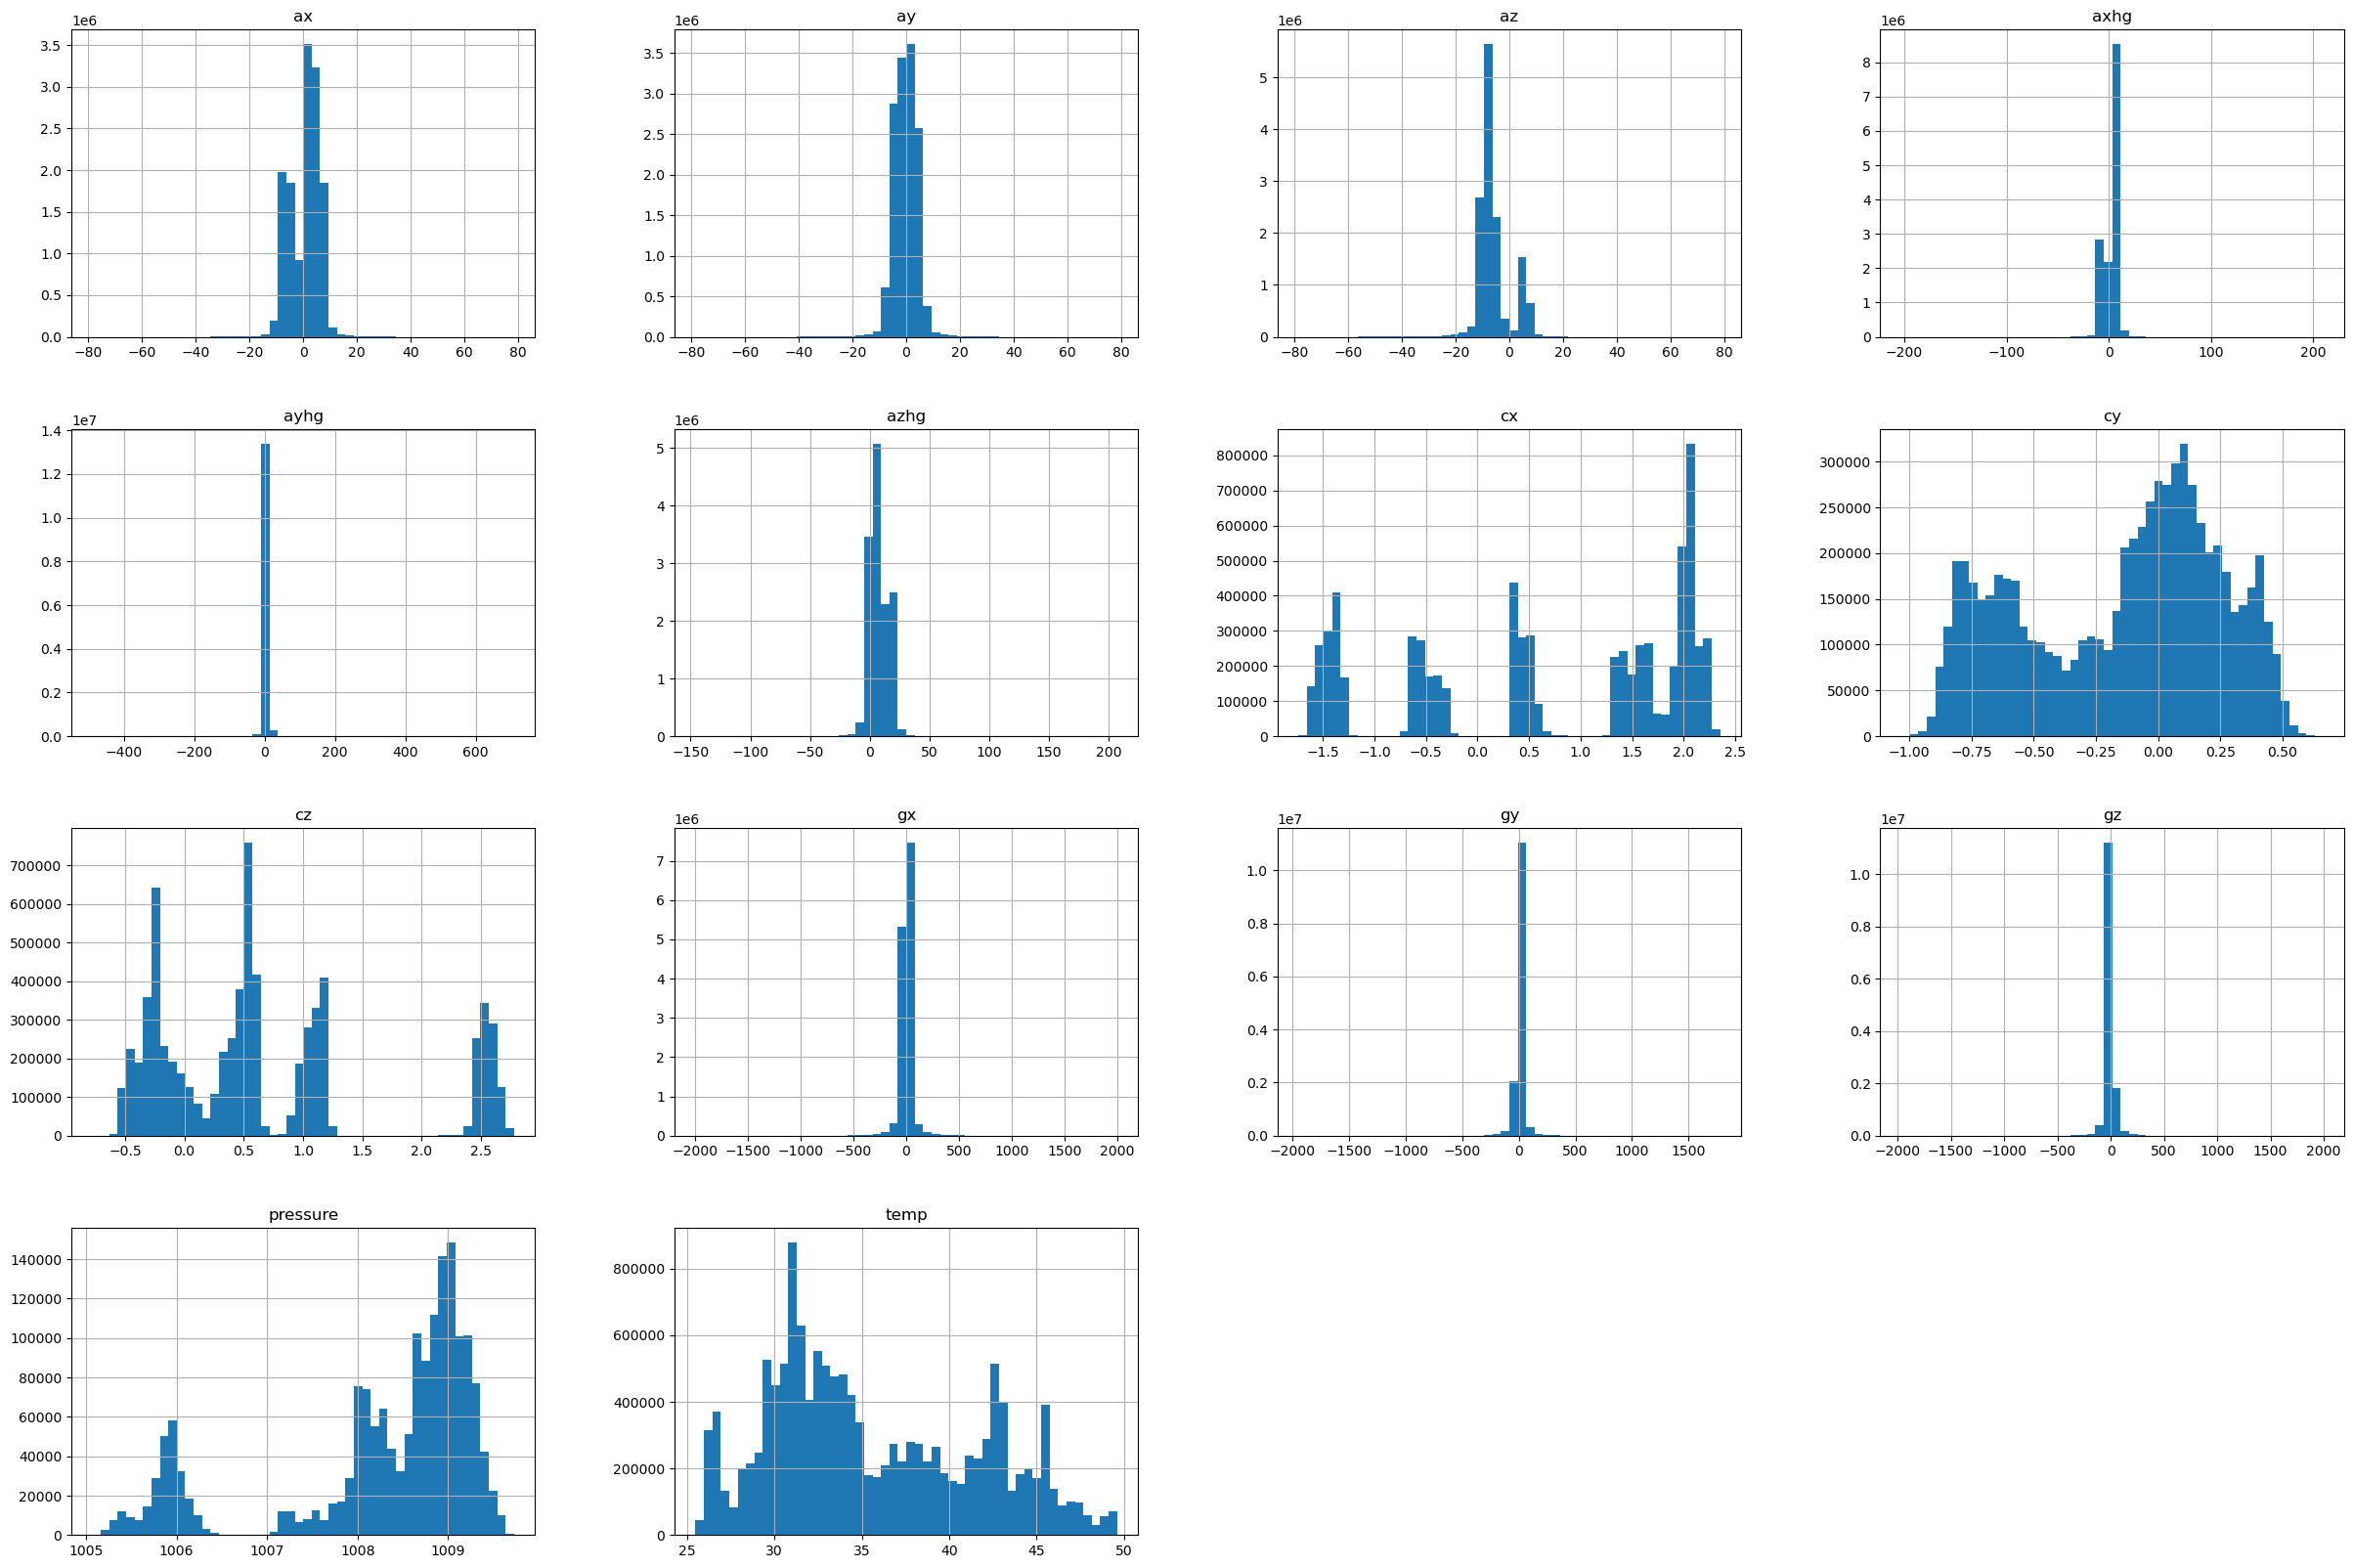

In [5]:

# Select columns to create histograms for (e.g., 'ax', 'ay', 'az', 'pressure', 'temp')
selected_columns = ['ax', 'ay', 'az', 'axhg', 'ayhg', 'azhg', 'cx', 'cy', 'cz', 'gx', 'gy', 'gz', 'pressure', 'temp']

df[selected_columns].hist(bins=50, figsize=(30,20))
plt.show()

#### Removing the columns that contain missing values 


In [6]:
# Defining the function to identify and remove all columns that contain missing values
def remove_columns_with_missing_values(df):
    """
    Removes columns with missing values from a DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The DataFrame with missing value columns removed.
    """
    
    # Identify columns with missing values
    columns_with_missing_values = df.columns[df.isnull().any()]
    
    # Remove columns with missing values
    df_cleaned = df.drop(columns = columns_with_missing_values)
    
    return df_cleaned

# Call the function to remove the columns that contain missing values
df_cleaned = remove_columns_with_missing_values(df)

# have a look at the new cleaned dataset
df_cleaned.head()

,label,animal_ID,segment_ID,timestamp_ms,ax,ay,az,axhg,ayhg,azhg,gx,gy,gz,temp
0,walking,G1,1,1,1.57538,4.34787,-9.27514,5.61615,8.19897,10.21120,10.54880,-28.4756,91.9512,28.16
1,walking,G1,1,6,1.47962,4.30477,-9.31105,4.98546,8.64947,4.47490,9.51220,-27.0732,88.1707,28.15
2,walking,G1,1,11,1.36469,4.24492,-9.42118,5.19569,9.25012,5.79634,9.57317,-25.2439,83.9634,28.16
3,walking,G1,1,16,1.21386,4.22816,-9.59835,4.23463,8.82966,9.28016,11.21950,-22.9878,79.2683,28.16
4,walking,G1,1,21,1.07021,4.29520,-9.67257,5.13562,7.89864,5.88644,13.47560,-19.8780,73.8415,28.14


#### Class distribution


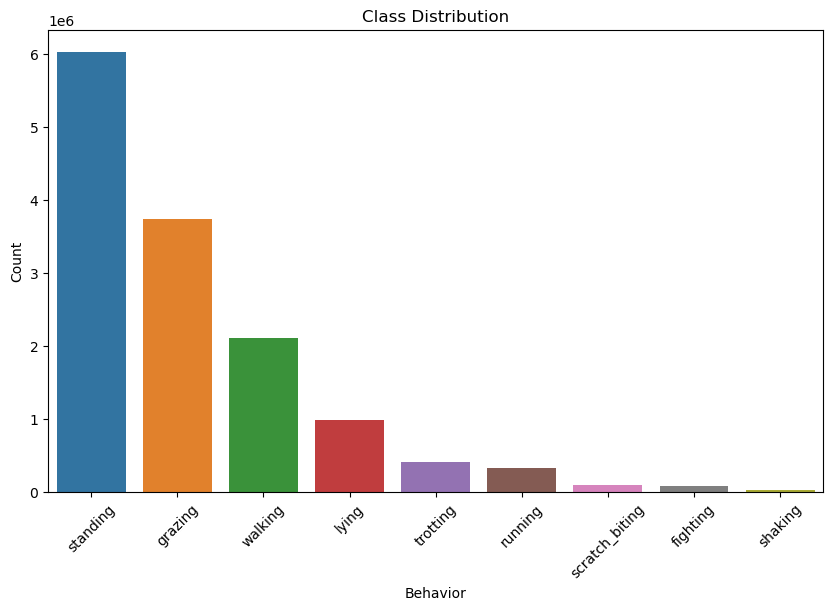

In [7]:


# Count the occurrences of each behavior class
class_counts = df_cleaned['label'].value_counts()

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Behavior')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.savefig('class_distribution_barplot', dpi=300)
plt.show()


#### Correlation Analysis


In [8]:
numerical_features = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

# Calculate and visualize feature correlations
correlation_matrix = df_cleaned[numerical_features].corr()
correlation_matrix


,ax,ay,az,gx,gy,gz
ax,1.000000,0.113400,0.243339,0.038723,-0.012482,-0.027463
ay,0.113400,1.000000,-0.132366,0.117453,-0.043101,-0.018925
az,0.243339,-0.132366,1.000000,0.025681,-0.024909,-0.033320
gx,0.038723,0.117453,0.025681,1.000000,-0.065109,-0.035213
gy,-0.012482,-0.043101,-0.024909,-0.065109,1.000000,0.076284
gz,-0.027463,-0.018925,-0.033320,-0.035213,0.076284,1.000000


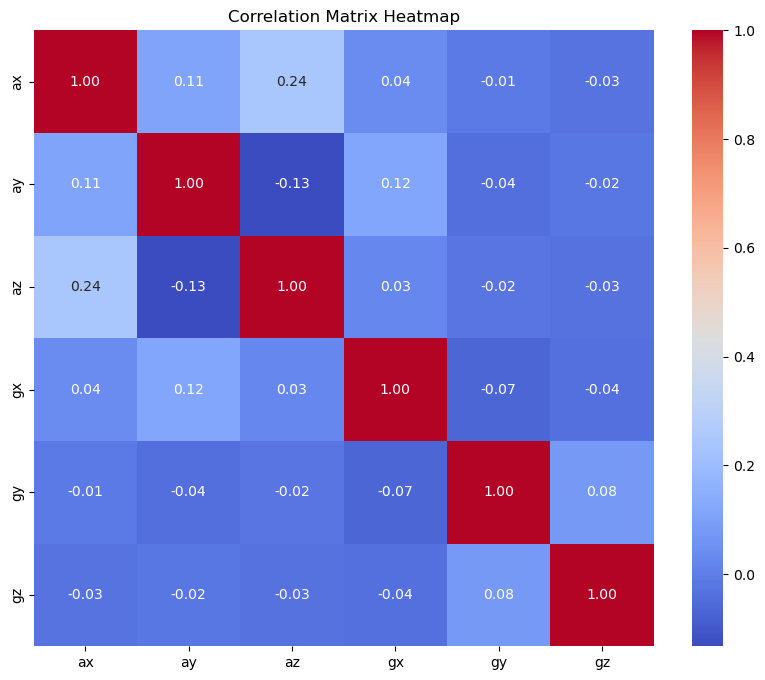

In [9]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


#### Outlier Detection

Detecting outliers using box plots:

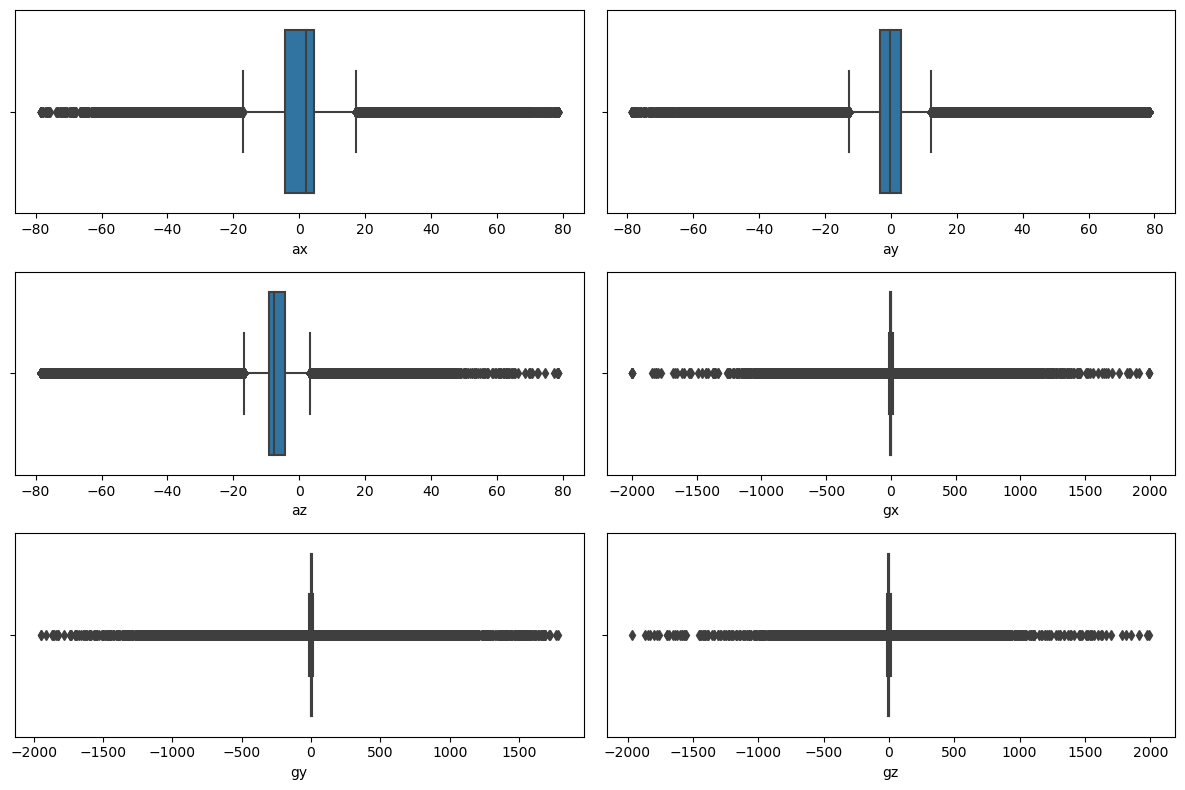

In [10]:
# Create box plots for numerical features to detect outliers

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 2, numerical_features.index(feature) + 1)
    sns.boxplot(x=df[feature])
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


### Windowing and feature extraction


In [11]:
# Select the columns you need from df
# We will select only accelerometer readings for this project
def drop_unneeded_columns(df):
    """
    Drop columns that are not needed for feature extraction.

    Parameters:
    df (pd.DataFrame): DataFrame containing accelerometer data.

    Returns:
    pd.DataFrame: DataFrame with unnecessary columns dropped.
    """
    # List of columns to keep (accelerometer columns)
    # Include 'label' column to keep classes
    columns_to_keep = ['label', 'ax', 'ay', 'az']  

    # Drop columns not in the list
    df = df[columns_to_keep]

    return df

def calculate_magnitude(df):
    """
    Calculate the magnitude of accelerometer readings and add it as a new column.

    Parameters:
    df (pd.DataFrame): DataFrame containing accelerometer data.

    Returns:
    pd.DataFrame: DataFrame with magnitude column added.
    """
    # Calculate magnitude
    df['magnitude'] = np.sqrt(df['ax']**2 + df['ay']**2 + df['az']**2)

    return df

# Select the columns and define the new dataset
df_new = drop_unneeded_columns(df_cleaned)

# Calculating the magnitude and adding it to the new dataset  
df_mag = calculate_magnitude(df_new)


C:\Users\nklea\AppData\Local\Temp\ipykernel_19020\3550107410.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['magnitude'] = np.sqrt(df['ax']**2 + df['ay']**2 + df['az']**2)


In [12]:
# Defining the sample rate, window size and overlap
sample_rate = 200  # Sample rate in Hz
window_duration = 5  # Desired window duration in seconds
overlap_percent = 50  # Desired overlap percentage

# Calculate the window size in samples
window_size = int(sample_rate * window_duration)

# Calculate the step size for overlapping windows
overlap_size = int(window_size * (overlap_percent / 100))

print(f"Window size: {window_size} samples")
print(f"Overlap size: {overlap_size} samples")

Window size: 1000 samples
Overlap size: 500 samples


In [13]:
from scipy.stats import skew, kurtosis
from scipy.integrate import simps


def extract_features_with_windows(dataset, window_size, overlap_percent):
    """
    Extracts features from a dataset using sliding windows.

    Parameters:
    dataset (pd.DataFrame): The dataset containing sensor data with 'label'
    column.
    window_size (int): The size of the sliding window in samples.
    overlap_percent (int): The overlap percentage between consecutive windows.

    Returns:
    pd.DataFrame: A DataFrame containing extracted features for each window with
    corresponding labels.
    """
    features = []
    labels = []

    # Calculate the step size for overlapping windows
    step_size = int(window_size * (overlap_percent / 100))

    for i in range(0, len(dataset) - window_size + 1, step_size):
        window_data = dataset.iloc[i:i + window_size].copy()  # Create a copy of the window_data

        # Extract features from the window_data here
        window_features = []

        # Calculate mean for accelerometer axes and magnitude
        for axis in ['ax', 'ay', 'az', 'magnitude']:
            window_features.append(window_data[axis].mean())

        # Calculate crest factor for accelerometer axes
        for axis in ['ax', 'ay', 'az']:
            crest_factor = window_data[axis].max() / window_data[axis].std()
            window_features.append(crest_factor)

        # Calculate root mean square velocity
        rms_velocity = np.sqrt(np.mean(window_data['ax']**2 +
                       window_data['ay']**2 + window_data['az']**2))
        window_features.append(rms_velocity)

        # Calculate skewness for accelerometer axes
        for axis in ['ax', 'ay', 'az']:
            window_features.append(skew(window_data[axis]))

        # Calculate kurtosis for accelerometer axes
        for axis in ['ax', 'ay', 'az']:
            window_features.append(kurtosis(window_data[axis]))

        # Calculate the madogram
        madogram = simps(window_data['ax'], dx=1/sample_rate)
        window_features.append(madogram)

        # Calculate zero crossing rate
        zero_crossings = np.sum(np.diff(np.sign(window_data['ax'])) != 0)
        window_features.append(zero_crossings)

        # Calculate squared integrals
        for axis in ['ax', 'ay', 'az']:
            squared_integral = simps(window_data[axis]**2, dx=1/sample_rate)
            window_features.append(squared_integral)

        # Calculate signal entropy, checking for invalid values and divide by zero
        entropy_values = window_data['ax'] / np.sum(window_data['ax'])
        entropy_values = entropy_values.replace([np.inf, -np.inf], np.nan)
        entropy_values = entropy_values.dropna()
        
        signal_entropy = -np.sum(entropy_values * np.log(entropy_values))
        window_features.append(signal_entropy)

        # Determine the majority label within the window
        majority_label = window_data['label'].mode().iloc[0]
        
        features.append(window_features)
        labels.append(majority_label)

    # Create a DataFrame with the extracted features and labels
    feature_names = ['mean_ax', 'mean_ay', 'mean_az', 'mean_magnitude',
                     'crest_factor_ax', 'crest_factor_ay', 'crest_factor_az',
                     'rms_velocity', 'skewness_ax', 'skewness_ay',
                     'skewness_az', 'kurtosis_ax', 'kurtosis_ay',
                     'kurtosis_az', 'madogram', 'zero_crossing_rate',
                     'squared_integral_ax', 'squared_integral_ay',
                     'squared_integral_az', 'signal_entropy']

    feature_df = pd.DataFrame(features, columns=feature_names)
    label_df = pd.DataFrame(labels, columns=['label'])

    return pd.concat([feature_df, label_df], axis=1)

extracted_features = extract_features_with_windows(df_mag, window_size, overlap_percent)

In [16]:
extracted_features.head()

,mean_ax,mean_ay,mean_az,mean_magnitude,crest_factor_ax,crest_factor_ay,crest_factor_az,rms_velocity,skewness_ax,skewness_ay,...,kurtosis_ax,kurtosis_ay,kurtosis_az,madogram,zero_crossing_rate,squared_integral_ax,squared_integral_ay,squared_integral_az,signal_entropy,label
0,2.541740,3.050385,-9.745604,10.920993,4.652081,4.132055,-0.827056,11.500836,0.475957,0.377484,...,0.285753,-0.267702,1.787354,12.692154,14,56.330224,73.685486,530.911325,6.802981,walking
1,2.968777,2.455405,-9.717682,10.925451,4.750321,3.665289,-0.765071,11.580439,0.401393,0.323726,...,0.450092,-0.474129,2.272384,14.829974,10,67.767884,64.748486,537.314992,6.794263,walking
2,3.031146,1.700539,-9.922606,10.970367,5.143013,3.848897,-1.086701,11.632549,0.779618,0.490520,...,1.251665,0.331088,2.130374,15.136000,8,66.676773,54.868623,554.606337,6.720053,walking
3,3.039619,1.803420,-9.993869,11.071202,5.302122,3.518089,-1.086191,11.768863,0.778212,0.570948,...,0.901106,0.115121,1.199114,15.186534,6,65.761368,64.674534,561.593837,6.716908,walking
4,2.985110,1.770687,-10.094641,11.188163,4.691172,3.296635,-0.986136,12.057264,0.584956,0.664698,...,-0.238474,-0.583705,0.591899,14.906817,10,67.749927,70.051205,587.869523,6.668666,walking


In [17]:
# Checking the distribution of the classes
extracted_features['label'].value_counts()

label
standing          12063
grazing            7472
walking            4220
lying              1968
trotting            814
running             649
scratch_biting      186
fighting            150
shaking              33
Name: count, dtype: int64

In [18]:
missing_values = extracted_features.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
mean_ax                0
mean_ay                0
mean_az                0
mean_magnitude         0
crest_factor_ax        0
crest_factor_ay        0
crest_factor_az        0
rms_velocity           0
skewness_ax            0
skewness_ay            0
skewness_az            0
kurtosis_ax            0
kurtosis_ay            0
kurtosis_az            0
madogram               0
zero_crossing_rate     0
squared_integral_ax    0
squared_integral_ay    0
squared_integral_az    0
signal_entropy         0
label                  0
dtype: int64


### Splitting the dataset

In [19]:
from sklearn.model_selection import train_test_split

# Define the features (X) and labels (y)
X = extracted_features.drop(columns=['label'])
y = extracted_features['label']

# Perform the initial split into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Further split the temp set into validation (50%) and test (50%)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)


### Feature scaling

In [20]:
# Importing the library
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scalers for Min-Max scaling and standardization
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Perform Min-Max scaling on the training and test sets
X_train_min_max_scaled = min_max_scaler.fit_transform(X_train)
X_validation_min_max_scaled = min_max_scaler.transform(X_validation)
X_test_min_max_scaled = min_max_scaler.transform(X_test)

# Perform standardization on the training and test sets
X_train_standardized = standard_scaler.fit_transform(X_train)
X_validation_standardized = standard_scaler.fit_transform(X_validation)
X_test_standardized = standard_scaler.transform(X_test)


In [21]:
# Creating the new dataframes with the standardized and normalized features
X_train_s = pd.DataFrame(X_train_standardized, columns = X_train.columns)
X_validation_s = pd.DataFrame(X_validation_standardized, columns = X_validation.columns)
X_test_s = pd.DataFrame(X_test_standardized, columns = X_test.columns)

X_train_n = pd.DataFrame(X_train_min_max_scaled, columns = X_train.columns)
X_validation_n = pd.DataFrame(X_validation_min_max_scaled, columns = X_validation.columns)
X_test_n = pd.DataFrame(X_test_min_max_scaled, columns = X_test.columns)

### Training ML models and Evaluating on the validation set


In [22]:
# Importing the libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

# Define results dictionaries for standardized and normalized datasets
results_std = {}
results_minmax = {}

# Choose appropriate models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100,
                         random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine (Radial)": SVC(kernel="rbf", C=1),
    "Multilayer perceptron (MLP)": MLPClassifier(hidden_layer_sizes=(128,),  
                                                 activation='relu',
                                                 solver='adam',  
                                                 max_iter=100,  
                                                 random_state=42)
}

# Function to train and evaluate models with LabelEncoder
def evaluate_models(X_train, X_validation, y_train, y_validation, scaler_name, results_dict):
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_validation_encoded = label_encoder.transform(y_validation)
    
    for model_name, model in models.items():
        model.fit(X_train, y_train_encoded)
        y_pred_encoded = model.predict(X_validation)
        accuracy = accuracy_score(y_validation_encoded, y_pred_encoded)
        classification_rep = classification_report(y_validation_encoded,
                                                   y_pred_encoded)
        
        confusion_matrix_encoded = confusion_matrix(y_validation_encoded,
                                                    y_pred_encoded)
        
        results_dict[model_name] = {"Confusion Matrix": confusion_matrix_encoded,
                                 "Accuracy": accuracy, 
                                 "Classification Report": classification_rep,
                                 "Scaler": scaler_name}

# Evaluate models on the standardized dataset
evaluate_models(X_train_s, X_validation_s, y_train, y_validation,
                "StandardScaler", results_std)

# Evaluate models on the normalized dataset
evaluate_models(X_train_n, X_validation_n, y_train, y_validation, "MinMaxScaler",
                results_minmax)


In [23]:
# Print the results for both datasets
print("Results for Standardized Dataset:")
for model_name, metrics in results_std.items():
    print(f"Model: {model_name} (Scaler: {metrics['Scaler']})")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Classification Report:\n{metrics['Classification Report']}\n")

print("Results for Normalized Dataset:")
for model_name, metrics in results_minmax.items():
    print(f"Model: {model_name} (Scaler: {metrics['Scaler']})")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Classification Report:\n{metrics['Classification Report']}\n") 


Results for Standardized Dataset:
Model: Random Forest (Scaler: StandardScaler)
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.92      0.93      0.93      1121
           2       0.94      0.58      0.72       295
           3       0.97      0.98      0.97        97
           4       0.86      0.21      0.34        28
           5       1.00      0.80      0.89         5
           6       0.90      0.96      0.93      1809
           7       0.95      0.94      0.95       122
           8       0.95      0.95      0.95       633

    accuracy                           0.92      4133
   macro avg       0.94      0.80      0.84      4133
weighted avg       0.92      0.92      0.91      4133


Model: Gradient Boosting (Scaler: StandardScaler)
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.57

In [24]:
# Random forest training

def train_random_forest(X_train, y_train, X_val, y_val, n_estimators=100, max_depth=None, random_state=42):
    """
    Train a Random Forest classifier on the provided training data and evaluate it on validation data.

    Parameters:
    - X_train: Training data features
    - y_train: Training data labels
    - X_val: Validation data features
    - y_val: Validation data labels
    - n_estimators: Number of trees in the Random Forest
    - max_depth: Maximum depth of the trees
    - random_state: Seed for reproducibility

    Returns:
    - rf_model: Trained Random Forest model
    - performance_metrics: Classification report for the model on validation data
    """

    # Initialize the Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

    # Train the model on the training data
    rf_model.fit(X_train, y_train)

    # Predict the labels on validation data
    y_val_pred = rf_model.predict(X_val)

    # Generate performance metrics
    performance_metrics = classification_report(y_val, y_val_pred)

    print("Random Forest Model Performance on Validation Data:")
    print(performance_metrics)
    
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred) * 100:.2f}%")

    return rf_model, performance_metrics

# Example of how to use the function (assuming you have X_val and y_val as your validation data):
rf_model, metrics = train_random_forest(X_train_n, y_train, X_validation_n, y_validation)


Random Forest Model Performance on Validation Data:
                precision    recall  f1-score   support

      fighting       0.91      0.87      0.89        23
       grazing       0.92      0.94      0.93      1121
         lying       0.93      0.85      0.89       295
       running       0.98      0.98      0.98        97
scratch_biting       0.89      0.29      0.43        28
       shaking       1.00      1.00      1.00         5
      standing       0.94      0.96      0.95      1809
      trotting       0.97      0.93      0.95       122
       walking       0.95      0.94      0.95       633

      accuracy                           0.94      4133
     macro avg       0.94      0.86      0.88      4133
  weighted avg       0.94      0.94      0.94      4133

Accuracy: 93.90%


### Feature Selection using Feature Importance of the RF model


In [25]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Get sorted indices based on importance scores
sorted_indices = feature_importances.argsort()[::-1]

# Display the feature rankings
print("Feature rankings based on importance:")


for i, index in enumerate(sorted_indices, 1):
    print(f"{i}. Feature {index} - Importance: {feature_importances[index]:.4f}")

# For the sake of example, let's select the top 10 features (you can choose any number)
top_features = [X_train_n.columns[i] for i in sorted_indices[:10]]

# Rebuild the model with top-ranked features
X_train_top_features = X_train_n[top_features]
rf_model.fit(X_train_top_features, y_train)



Feature rankings based on importance:
1. Feature 7 - Importance: 0.1588
2. Feature 6 - Importance: 0.1404
3. Feature 3 - Importance: 0.0923
4. Feature 4 - Importance: 0.0821
5. Feature 5 - Importance: 0.0632
6. Feature 16 - Importance: 0.0519
7. Feature 18 - Importance: 0.0499
8. Feature 0 - Importance: 0.0479
9. Feature 1 - Importance: 0.0461
10. Feature 14 - Importance: 0.0436
11. Feature 2 - Importance: 0.0367
12. Feature 17 - Importance: 0.0362
13. Feature 15 - Importance: 0.0303
14. Feature 12 - Importance: 0.0264
15. Feature 13 - Importance: 0.0232
16. Feature 10 - Importance: 0.0178
17. Feature 11 - Importance: 0.0158
18. Feature 8 - Importance: 0.0151
19. Feature 9 - Importance: 0.0147
20. Feature 19 - Importance: 0.0079


RandomForestClassifier(random_state=42)

In [26]:
# Ensure that your validation data has the same features as X_train
# Select only the top-ranked features from the validation dataset
X_val_top_features = X_validation_n[top_features]

# Predict using the new model
y_val_pred = rf_model.predict(X_val_top_features)

# Display model performance
print("Random Forest Model Performance on Validation Data (Top Features):")
print("Accuracy:", accuracy_score(y_validation, y_val_pred))
print("Classification Report:")
print(classification_report(y_validation, y_val_pred))


Random Forest Model Performance on Validation Data (Top Features):
Accuracy: 0.9363658359545125
Classification Report:
                precision    recall  f1-score   support

      fighting       0.95      0.78      0.86        23
       grazing       0.93      0.93      0.93      1121
         lying       0.93      0.84      0.88       295
       running       0.97      0.97      0.97        97
scratch_biting       0.75      0.32      0.45        28
       shaking       1.00      0.60      0.75         5
      standing       0.94      0.96      0.95      1809
      trotting       0.92      0.92      0.92       122
       walking       0.94      0.94      0.94       633

      accuracy                           0.94      4133
     macro avg       0.93      0.81      0.85      4133
  weighted avg       0.94      0.94      0.94      4133



### PCA experiment

In [27]:
from sklearn.decomposition import PCA


def apply_pca(X_train, y_train, X_validation, y_validation, n_components=0.95):
    """
    Apply PCA on the training dataset and validate using a Random Forest model.
    
    Parameters:
    - X_train: Training features.
    - y_train: Training labels.
    - X_validation: Validation features.
    - y_validation: Validation labels.
    - n_components: Number of PCA components or explained variance.
    
    Returns:
    - RandomForest classifier trained on the transformed data.
    - Classification report on the validation data.
    """
    
    # Standardize the dataset
    scaler = StandardScaler()
    X_train_standardized = scaler.fit_transform(X_train)
    X_validation_standardized = scaler.transform(X_validation)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_standardized)
    X_validation_pca = pca.transform(X_validation_standardized)
    
    # Train and validate a Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_pca, y_train)
    y_val_pred = rf.predict(X_validation_pca)
    
    accuracy = accuracy_score(y_validation, y_val_pred)
    classification_rep = classification_report(y_validation, y_val_pred)
    
    return rf, accuracy, classification_rep

# You can call the function and print out the results as follows:
rf_model, acc, class_rep = apply_pca(X_train, y_train, X_validation, y_validation)
print("Random Forest Model Performance on Validation Data (PCA):")
print("Accuracy:", acc)
print("Classification Report:")
print(class_rep)



Random Forest Model Performance on Validation Data (PCA + SMOTE):
Accuracy: 0.9029760464553593
Classification Report:
                precision    recall  f1-score   support

      fighting       0.88      0.61      0.72        23
       grazing       0.91      0.89      0.90      1121
         lying       0.84      0.70      0.77       295
       running       0.95      0.97      0.96        97
scratch_biting       1.00      0.18      0.30        28
       shaking       1.00      0.80      0.89         5
      standing       0.88      0.94      0.91      1809
      trotting       0.96      0.93      0.95       122
       walking       0.96      0.92      0.94       633

      accuracy                           0.90      4133
     macro avg       0.93      0.77      0.81      4133
  weighted avg       0.90      0.90      0.90      4133



### Hyperparameter Tuning

In [28]:
# Install and Import Necessary Libraries

# !pip install optuna

import optuna
from sklearn.model_selection import cross_val_score

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/4c/6a/219a431aaf81b3eb3070fd2d58116baa366d3072f43bbcc87dc3495b7546/optuna-3.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/7f/50/9fb3a5c80df6eb6516693270621676980acd6d5a9a7efdbfa273f8d616c7/alembic-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/2b/8d/9f11d0b9ac521febb806e7f30dc5982d0f4f5821217712c59005fbc5c1e3/Mako-1.3.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/413.4 kB 1.3 MB/s eta 0:00:01
   ----- --------------------------------- 61.4/413.

### Define Objective Function for Optimization

In [29]:
def objective(trial):
    # Define hyperparameter space
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 10, 40, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt'])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Initialize and train classifier
    clf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        max_features=max_features, 
        bootstrap=bootstrap, 
        n_jobs=-1
    )
    
    # Use cross-validation to evaluate model performance
    return cross_val_score(clf, X_train_n, y_train, n_jobs=-1, cv=5).mean()


In [30]:
study = optuna.create_study(direction='maximize')  # We want to maximize the cross-validation score
study.optimize(objective, n_trials=100)  # Number of iterations

best_params = study.best_params
best_score = study.best_value


[I 2024-02-13 22:12:16,944] A new study created in memory with name: no-name-b0bbcb22-7469-498d-ba4b-67f64ce0e469
[I 2024-02-13 22:12:21,201] Trial 0 finished with value: 0.9321340703611873 and parameters: {'n_estimators': 165, 'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.9321340703611873.
[I 2024-02-13 22:12:25,529] Trial 1 finished with value: 0.9245646158083041 and parameters: {'n_estimators': 223, 'max_depth': 38, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.9321340703611873.
[I 2024-02-13 22:12:32,221] Trial 2 finished with value: 0.9321859778958845 and parameters: {'n_estimators': 179, 'max_depth': 38, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'auto', 'bootstrap': False}. Best is trial 2 with value: 0.9321859778958845.
[I 2024-02-13 22:12:37,410] Trial 3 finished with value: 0.9315119326175

[I 2024-02-13 22:15:30,641] Trial 30 finished with value: 0.9271050743176922 and parameters: {'n_estimators': 190, 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 19 with value: 0.93882215863034.
[I 2024-02-13 22:15:38,692] Trial 31 finished with value: 0.9379925923566356 and parameters: {'n_estimators': 259, 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 19 with value: 0.93882215863034.
[I 2024-02-13 22:15:46,991] Trial 32 finished with value: 0.9381480999113864 and parameters: {'n_estimators': 280, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 19 with value: 0.93882215863034.
[I 2024-02-13 22:15:54,110] Trial 33 finished with value: 0.9377852982324422 and parameters: {'n_estimators': 235, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_fea

[I 2024-02-13 22:18:08,733] Trial 61 finished with value: 0.9391332275021764 and parameters: {'n_estimators': 190, 'max_depth': 32, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 44 with value: 0.9400147147511617.
[I 2024-02-13 22:18:14,515] Trial 62 finished with value: 0.9390295065168687 and parameters: {'n_estimators': 186, 'max_depth': 33, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 44 with value: 0.9400147147511617.
[I 2024-02-13 22:18:19,365] Trial 63 finished with value: 0.9394960963840393 and parameters: {'n_estimators': 157, 'max_depth': 35, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 44 with value: 0.9400147147511617.
[I 2024-02-13 22:18:23,764] Trial 64 finished with value: 0.9259644794939028 and parameters: {'n_estimators': 158, 'max_depth': 35, 'min_samples_split': 3, 'min_samples_leaf': 9, 'm

[I 2024-02-13 22:21:10,428] Trial 92 finished with value: 0.9407404256337202 and parameters: {'n_estimators': 217, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}. Best is trial 71 with value: 0.9408960407131414.
[I 2024-02-13 22:21:17,332] Trial 93 finished with value: 0.9386666510755894 and parameters: {'n_estimators': 216, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': False}. Best is trial 71 with value: 0.9408960407131414.
[I 2024-02-13 22:21:24,710] Trial 94 finished with value: 0.9399627400135454 and parameters: {'n_estimators': 240, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}. Best is trial 71 with value: 0.9408960407131414.
[I 2024-02-13 22:21:31,504] Trial 95 finished with value: 0.9312527040774563 and parameters: {'n_estimators': 232, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 5, 'm

In [31]:
best_params

{'n_estimators': 223,
 'max_depth': 24,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'bootstrap': False}

In [32]:
best_score

0.941725499462175

In [33]:
best_rf = RandomForestClassifier(**best_params, n_jobs=-1)
best_rf.fit(X_train_n, y_train)

predictions = best_rf.predict(X_validation_n)

from sklearn.metrics import classification_report, accuracy_score

print(f"Accuracy: {accuracy_score(y_validation, predictions) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_validation, predictions))

Accuracy: 94.82%

Classification Report:
                 precision    recall  f1-score   support

      fighting       0.91      0.87      0.89        23
       grazing       0.93      0.95      0.94      1121
         lying       0.95      0.88      0.91       295
       running       0.98      0.99      0.98        97
scratch_biting       1.00      0.32      0.49        28
       shaking       1.00      1.00      1.00         5
      standing       0.95      0.97      0.96      1809
      trotting       0.97      0.94      0.96       122
       walking       0.96      0.95      0.95       633

      accuracy                           0.95      4133
     macro avg       0.96      0.87      0.90      4133
  weighted avg       0.95      0.95      0.95      4133



In [35]:
# Train the Random Forest classifier with the best hyperparameters on the combined training and validation sets
final_rf = RandomForestClassifier(
    n_estimators=223,
    max_depth=24,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=False,
    n_jobs=-1
)

# Fit the model to the training data
final_rf.fit(X_train_n, y_train)

# Predict on the test set
test_predictions = final_rf.predict(X_test_n)

# Evaluate the predictions
print(f"Accuracy on Test Set: {accuracy_score(y_test, test_predictions) * 100:.2f}%")
print("\nClassification Report on Test Set:\n", classification_report(y_test, test_predictions))


Accuracy on Test Set: 95.11%

Classification Report on Test Set:
                 precision    recall  f1-score   support

      fighting       0.85      0.77      0.81        22
       grazing       0.95      0.95      0.95      1121
         lying       0.95      0.85      0.89       295
       running       0.97      0.96      0.96        98
scratch_biting       0.83      0.36      0.50        28
       shaking       0.83      1.00      0.91         5
      standing       0.95      0.98      0.96      1810
      trotting       0.93      0.94      0.94       122
       walking       0.97      0.96      0.97       633

      accuracy                           0.95      4134
     macro avg       0.92      0.86      0.88      4134
  weighted avg       0.95      0.95      0.95      4134

